In [31]:
import pandas as pd
import pandas_ta as ta
import json
from math import floor
from datetime import datetime

In [32]:
candles = json.loads(open("./dataset15M.json").read())
dates = [datetime.fromtimestamp(c[0]/1000) for c in candles]

#candles = json.loads(open("./dataset1M.json").read())
#dates = [datetime.fromtimestamp(c[0]/1000) for c in candles]
#df_1m = pd.DataFrame([c[1:] for c in candles[:-1]], index=dates[:-1], columns=["open", "high", "low", "close", "volume"])

In [33]:
df = pd.DataFrame([c[1:] for c in candles[:-1]], index=[i for i in range(len(candles)-1)], columns=["open", "high", "low", "close", "volume"])
df["EMA50"] = df.ta.ema(50)
df["EMA60"] = df.ta.ema(60)
df["EMA70"] = df.ta.ema(70)
df["EMA80"] = df.ta.ema(80)
df["EMA90"] = df.ta.ema(90)
df["EMA100"] = df.ta.ema(100)
df["EMA200"] = df.ta.ema(200)
df["EMA300"] = df.ta.ema(300)
df = df.dropna().reset_index()
df.head()

,index,open,high,low,close,volume,EMA50,EMA60,EMA70,EMA80,EMA90,EMA100,EMA200,EMA300
0,299,392.62,392.79,391.05,391.63,6251.41400,392.535575,392.225474,391.854102,391.431568,390.967901,390.500318,385.797250,380.583567
1,300,391.59,392.30,390.88,392.01,12623.12850,392.514964,392.218409,391.858493,391.445850,390.990804,390.530213,385.859069,380.659490
2,301,392.00,392.65,391.51,391.76,10666.91836,392.485358,392.203379,391.855719,391.453607,391.007710,390.554565,385.917784,380.733247
3,302,391.75,393.13,389.71,392.90,14777.74746,392.501618,392.226219,391.885135,391.489321,391.049299,390.601009,385.987259,380.814090
4,303,392.94,394.45,392.41,392.61,12753.17310,392.505869,392.238802,391.905554,391.516992,391.083600,390.640791,386.053157,380.892468


In [34]:
buy = False
sell = False
winRate = []
wallet = [100]
saveWallet = [0]
initQ = wallet[-1]
for j in range(len(df["close"])):
    #if saveWallet[-1] > 100:
    #    print(j)
    #    break
    i = df.index[j]
    if df["close"][i] > df["EMA300"][i] > df["EMA100"][i] and not buy:
        buy = df["close"][i]
    elif buy and df["close"][i] <= (buy - (buy * 0.01)):
        winRate.append(0)
        r = wallet[-1] + (wallet[-1] * ((df["close"][i] - buy)/buy) * 2)
        wallet.append(r)
        buy = False
    elif buy and df["close"][i] >= (buy + (buy * 0.01)):
        winRate.append(1)
        if wallet[-1] < initQ:
            r = wallet[-1] + (wallet[-1] * ((df["close"][i] - buy)/buy) * 2)
            wallet.append(r)
        else:
            r = saveWallet[-1] + (wallet[-1] * ((df["close"][i] - buy)/buy) * 2)
            saveWallet.append(r)
        buy = False
print("{}%".format(round((sum(winRate) / len(winRate)) * 100, 2)))
print("Nb trades : {}".format(len(winRate)))

56.41%
Nb trades : 585


360.8008959366356


<AxesSubplot:>

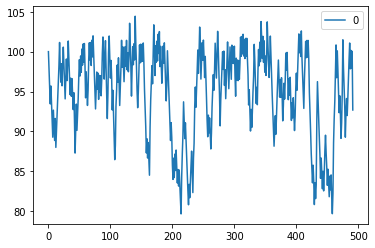

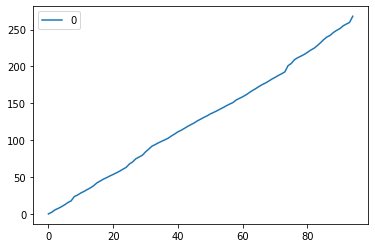

In [35]:
print(wallet[-1] + saveWallet[-1])
pd.DataFrame(wallet).plot()
pd.DataFrame(saveWallet).plot()

In [41]:
buy = False
sell = False
winRate = []
wallet = [100]
saveWallet = [0]
initQ = wallet[-1]
for j in range(len(df["close"])):
    #if wallet[-1] < 300:
    #    break
    i = df.index[j]
    if df["close"][i] < df["EMA300"][i] < df["EMA100"][i] and not buy:
        buy = df["close"][i]
        #print(datetime.fromtimestamp(round(candles[i][0]/1000)))
    elif buy and df["close"][i] >= (buy + (buy * 0.01)):
        winRate.append(0)
        if wallet[-1] < initQ:
            wallet.append(wallet[-1] + (wallet[-1] * ((buy - df["close"][i])/buy) * 3))
        else:
            wallet.append(wallet[-1] + (wallet[-1] * ((buy - df["close"][i])/buy) * 3))
        buy = False
    elif buy and df["close"][i] <= (buy - (buy * 0.01)):
        winRate.append(1)
        if wallet[-1] < initQ:
            wallet.append(wallet[-1] + (wallet[-1] * ((buy - df["close"][i])/buy) * 3))
        else:
            saveWallet.append(saveWallet[-1] + (wallet[-1] * ((buy - df["close"][i])/buy) * 3))
        buy = False
print("{}%".format(round((sum(winRate) / len(winRate)) * 100, 2)))
print("Nb trades : {}".format(len(winRate)))

50.52%
Nb trades : 762


248.38831767384266


<AxesSubplot:>

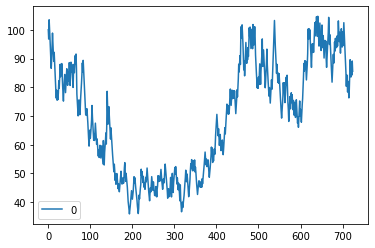

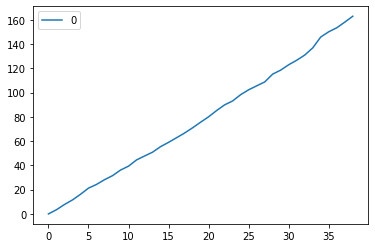

In [42]:
print(wallet[-1] + saveWallet[-1])
pd.DataFrame(wallet).plot()
pd.DataFrame(saveWallet).plot()

<AxesSubplot:>

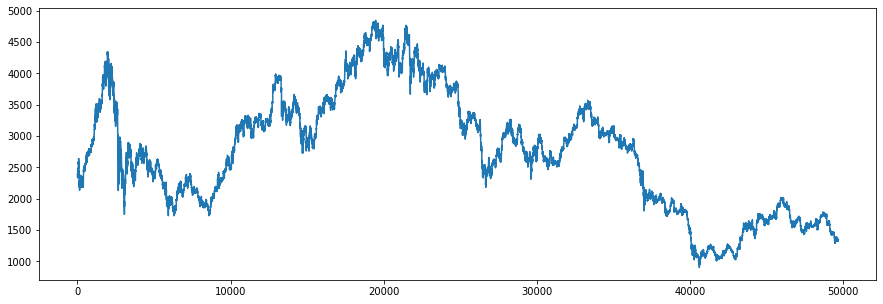

In [18]:
df["close"].plot(figsize=(15, 5))

In [19]:
datetime.fromtimestamp(round(candles[0][0]/1000))

datetime.datetime(2021, 4, 18, 18, 0)